In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

%matplotlib inline

#### Q8.7(a)

In [2]:
def sample(theta, n):
    """
    Draws n samples from uniform distribution in the interval (0, theta).
    """
    return np.random.uniform(0, theta, n)

In [3]:
def bootstrap(sample, B):
    """
    Performs bootstrapping B times from the given sample
    """
    n = sample.shape[0]
    bootstrap = np.zeros((B,50))
    for i in range(B):
        bootstrap[i,:] = np.random.choice(sample, 50)
    return bootstrap        

In [4]:
def maxestimator(bootstrap):
    return np.max(bootstrap, axis = 1)

In [5]:
def plotcdf(theta, n):
    x = np.arange(0, theta, 0.01)
    f = lambda x: n*(x/theta) ** (n-1) 
    y = f(x)
    plt.plot(x, y, 'g', label = 'True Distribution')

In [6]:
def finalplot(theta, n, B):
    samples = sample(theta, n)
    bootstraps = bootstrap(samples, B)
    max_samples = maxestimator(bootstraps)
    plt.hist(max_samples, label = 'Bootstrap Samples')
    plotcdf(1, 50)
    plt.legend(loc='best')
    plt.title('Bootstrapping Uniform distribution')
    i = 0
    savefilename = 'bootstrap'
    while os.path.exists('{}{:d}.png'.format(savefilename, i)):
        i += 1

    plt.savefig('{}{:d}.png'.format(savefilename, i))


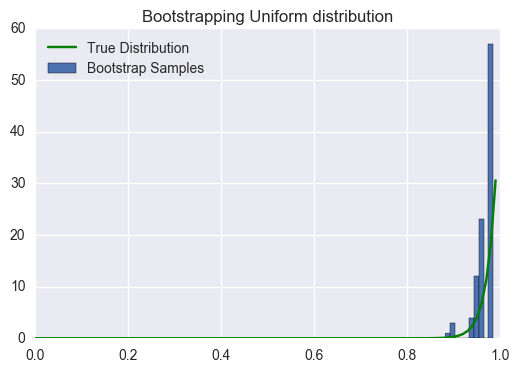

In [8]:
finalplot(1, 50, 100)

#### Q9.2

In [46]:
n = 500000

In [47]:
mle_tau = np.zeros((n,1))
for i in np.arange(n):
    s = np.random.uniform(1, 3, 10)
    s_max = np.max(s)
    s_min = np.min(s)
    mle_tau[i] = 0.5 * (s_max + s_min)

In [48]:
(1/n) * np.sum((mle_tau - 2) **2)

0.015173549832030588

In [49]:
mle_tau = np.zeros((n,1))
for i in np.arange(n):
    s = np.random.uniform(1, 3, 10)
    mle_tau[i] = np.mean(s)

In [50]:
(1/n) * np.sum((mle_tau - 2) **2)

0.03327741005826864